In [1]:
%config InlineBackend.figure_formats = ['svg']

import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as const
import uncertainties.unumpy as unp
from uncertainties.unumpy import nominal_values as noms, std_devs as stds, uarray as uar

s = np.array([-1e4, 1e4])
t = np.array([-1e16, 1e16])

Gelb

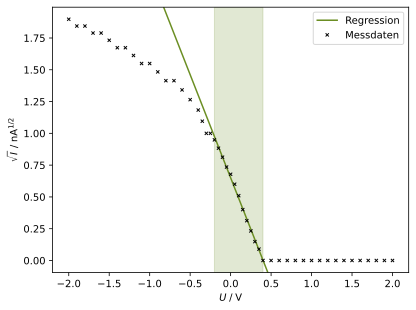

f(x) = ax + b

a = -1.621+/-0.027 nA^1/2 V^-1
b = 0.651+/-0.006 nA^1/2


Grenzspannung

NST = 0.401+/-0.008 V


In [2]:
U_g, I_g = np.genfromtxt('data/gelb.txt', unpack=True)

rU_g = U_g[U_g >= -0.2][U_g[U_g >= -0.2] <= 0.4]
rI_g = I_g[U_g >= -0.2][U_g[U_g >= -0.2] <= 0.4]

plt.axvspan(-0.2, 0.4, color='olivedrab', alpha=0.2)

par_g, cov_g = np.polyfit(rU_g, np.sqrt(rI_g), 1, cov=True)
err_g = np.sqrt(np.diag(cov_g))

fit_g = uar(par_g, err_g)

plt.plot(U_g, np.sqrt(I_g), 'kx', ms=0)
plt.xlim(plt.xlim())
plt.ylim(plt.ylim())
plt.plot(s, par_g[0] * s + par_g[1], c='olivedrab', label='Regression')
plt.plot(U_g, np.sqrt(I_g), 'kx', ms=3.21, label='Messdaten')

plt.xlabel(r'$U \; / \;$V')
plt.ylabel(r'$\sqrt{I} \; / \;$nA$^{1/2}$')
plt.legend()
plt.show()

print(f'f(x) = ax + b\n\na = {fit_g[0]} nA^1/2 V^-1\nb = {fit_g[1]} nA^1/2\n\n')

n_g = -fit_g[1] / fit_g[0]

print(f'Grenzspannung\n\nNST = {n_g} V')

Violett

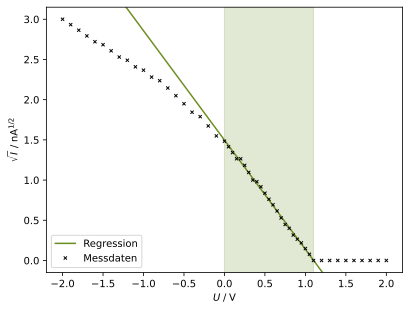

f(x) = ax + b

a = -1.359+/-0.013 nA^1/2 V^-1
b = 1.498+/-0.008 nA^1/2


Grenzspannung

NST = 1.102+/-0.012 V


In [3]:
U_v, I_v = np.genfromtxt('data/violett.txt', unpack=True)

rU_v = U_v[U_v >= 0][U_v[U_v >= 0] <= 1.1]
rI_v = I_v[U_v >= 0][U_v[U_v >= 0] <= 1.1]

plt.axvspan(0, 1.1, color='olivedrab', alpha=0.2)

par_v, cov_v = np.polyfit(rU_v, np.sqrt(rI_v), 1, cov=True)
err_v = np.sqrt(np.diag(cov_v))

fit_v = uar(par_v, err_v)

plt.plot(U_v, np.sqrt(I_v), 'kx', ms=0)
plt.xlim(plt.xlim())
plt.ylim(plt.ylim())
plt.plot(s, par_v[0] * s + par_v[1], c='olivedrab', label='Regression')
plt.plot(U_v, np.sqrt(I_v), 'kx', ms=3.21, label='Messdaten')

plt.xlabel(r'$U \; / \;$V')
plt.ylabel(r'$\sqrt{I} \; / \;$nA$^{1/2}$')
plt.legend()
plt.show()

print(f'f(x) = ax + b\n\na = {fit_v[0]} nA^1/2 V^-1\nb = {fit_v[1]} nA^1/2\n\n')

n_v = -fit_v[1] / fit_v[0]

print(f'Grenzspannung\n\nNST = {n_v} V')

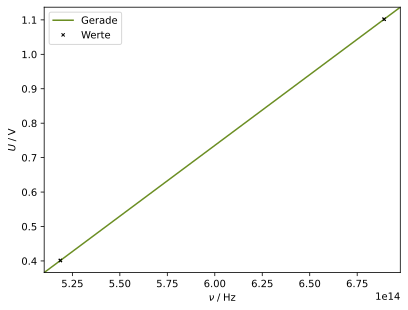

h/e_0 = (4.11+/-0.08)e-15 Vs

A_k/e_0 = -1.73+/-0.05 V


In [4]:
lam = np.array([578, 435]) * 1e-9
n = np.array([n_g, n_v])

c = const.c

nu = c / lam

a = (n[0] - n[1]) / (nu[0]- nu[1])
b = n[0] - a * nu[0]

plt.plot(nu, noms(n), 'kx', ms=3.21)
plt.xlim(plt.xlim())
plt.ylim(plt.ylim())
plt.plot(t, a.n * t + b.n, c='olivedrab', label='Gerade')
plt.plot(nu, noms(n), 'kx', ms=3.21, label='Werte')

plt.xlabel(r'$\nu \; / \;$Hz')
plt.ylabel(r'$U \; / \;$V')
plt.legend()
plt.show()

print(f'h/e_0 = {a} Vs\n\nA_k/e_0 = {b} V')